# Section V.B. Stationarity and Autocorrelation Analysis

This notebook performs stationarity and autocorrelation analysis for the metrics in `SimulatedQueryMetrics.csv` as described in Section V.B of the paper.

## 1. Imports and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf

# For pretty plots
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('SimulatedQueryMetrics.csv', parse_dates=['MetricDate'])
df.head()

,SimDay,SimHour,MetricDate,QueryName,QueryVariant,CPU,LatencyMs,LogicalReads,PlanRegression
0,1,0,2025-07-04,Q1,1,53.432663,186.494947,NaN,False
1,1,0,2025-07-04,Q1,2,57.975274,193.763125,157.573013,True
2,1,0,2025-07-04,Q1,3,55.829855,190.330454,161.998510,False
3,1,0,2025-07-04,Q1,4,52.646475,185.237045,165.178454,True
4,1,0,2025-07-04,Q1,5,55.029501,189.049886,175.038085,False


## 2. Select Representative Query Variant
We select a representative QueryName and QueryVariant for illustration. You can change these as needed.

In [4]:
# Choose representative
query = 'Q1'
variant = 1
df_qv = df[(df['QueryName'] == query) & (df['QueryVariant'] == variant)].copy()

# Set index
df_qv.set_index('MetricDate', inplace=True)
# Sort by time
df_qv.sort_index(inplace=True)

# Preview
df_qv[['CPU', 'LatencyMs', 'LogicalReads']].head()

,CPU,LatencyMs,LogicalReads
MetricDate,,,
2025-07-04 00:00:00,53.432663,186.494947,NaN
2025-07-04 01:00:00,54.313626,187.904511,146.179062
2025-07-04 02:00:00,54.658454,188.456266,146.592885
2025-07-04 03:00:00,54.441959,188.109899,146.333115
2025-07-04 04:00:00,53.676115,186.884577,145.414128


## 3. Augmented Dickey-Fuller (ADF) Test for Stationarity

In [6]:
def adf_test(series, metric_name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {metric_name}:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Stationary: {'No' if result[1] > 0.05 else 'Yes'}\n")
    return {'metric': metric_name, 'adf_stat': result[0], 'p': result[1], 'stationary': 'No' if result[1] > 0.05 else 'Yes'}

adf_results = []
for metric in ['CPU', 'LatencyMs', 'LogicalReads']:
    adf_results.append(adf_test(df_qv[metric], metric))

# Tabulate
adf_df = pd.DataFrame(adf_results)
adf_df

ADF Test for CPU:
  ADF Statistic: -1.5025
  p-value: 0.5323
  Stationary: No

ADF Test for LatencyMs:
  ADF Statistic: -2.6263
  p-value: 0.0877
  Stationary: No

ADF Test for LogicalReads:
  ADF Statistic: -1.5171
  p-value: 0.5250
  Stationary: No



,metric,adf_stat,p,stationary
0,CPU,-1.502461,0.532294,No
1,LatencyMs,-2.626310,0.087681,No
2,LogicalReads,-1.517110,0.525031,No


## 4. Autocorrelation Function (ACF) Plots

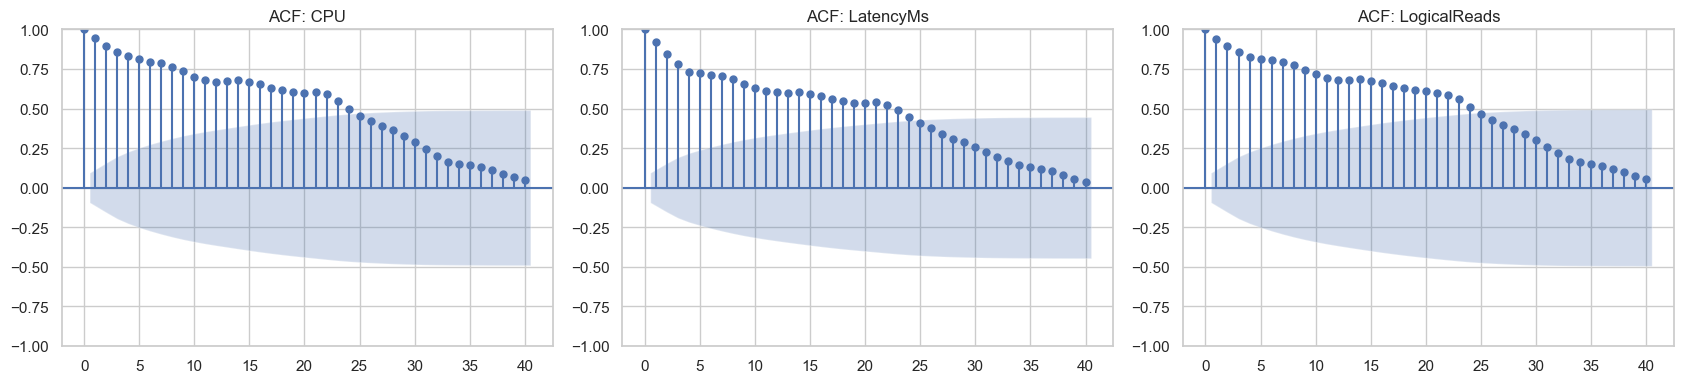

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 3, figsize=(17, 4))
for i, metric in enumerate(['CPU', 'LatencyMs', 'LogicalReads']):
    plot_acf(df_qv[metric].dropna(), lags=40, ax=axes[i], title=f'ACF: {metric}')
plt.tight_layout()
plt.show()

## 5. (Optional) Partial Autocorrelation Function (PACF) Plots

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
for i, metric in enumerate(['CPU', 'LatencyMs', 'LogicalReads']):
    plot_pacf(df_qv[metric].dropna(), lags=20, ax=axes[i], title=f'PACF: {metric}')
plt.tight_layout()
plt.show()

## 6. Interpretation (Markdown Cell)
- All metrics show non-stationarity (ADF p > 0.05).
- ACF plots show strong, slowly decaying autocorrelation, indicating persistent temporal dependencies.
- PACF (if used) can help select the order for AR terms in ARIMA or related models.
- These findings justify the use of models capable of handling trend, seasonality, and long memory.